<h2 align='center'> Bike Sharing Dataset </h2>

### Objective
The objective of the dataset is to predict the count of rental bikes. 

### About Data:
This database contains 17 attributes. The target variable refers to the count of rented bikes. 

#### Data Description 
- instant: record index
- dteday : date
- season : season (1: winter, 2: spring, 3: summer, 4: fall)
- yr : year (0: 2011, 1: 2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from Web)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

#### Acknowledgement
This dataset has been sourced from the <a href="https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset">UCI-ML repository.</a>

#### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [299]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from sklearn.metrics import r2_score, mean_squared_error

#### Importing  Dataset

In [12]:
df_hr = pd.read_csv('Dataset/hour.csv')
df_hr.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Inspecting Data

In [13]:
df_hr.shape

(17379, 17)

- Dataset comprises 17,379 observations(rows) and 147 features(columns).
- Out of the 17, one is the target variable and rest 16 are input variables.

In [14]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


* Dataset has 4 Float columns, 12 integer columns and 1 object (string) Columns
* Dataset has no null values as all the columns have 17379 observations

In [15]:
df_hr.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- This confirms that data has no null values

<hr>

- As Instant column is just like the index, so removing instant column from dataframe

In [16]:
df_hr.drop('instant', axis=1, inplace=True)
df_hr.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Statistical Summary 

In [22]:
df_hr.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000


- The attributes(predictors) "casual, registered, cnt" has huge difference in 75% and max value, which indicates the presence of outliers(extreme values) 
- Also, the attributes ""casual, registered, cnt" has large difference in their mean and meadian value, which confirms that mean is shifted due the presence of outliers. 

Observation : Dataset has Outliers. 

- atemp, temp, hum seems to be normally distributed as their mean and median value are approximately same.

## Exploratory Data Analysis

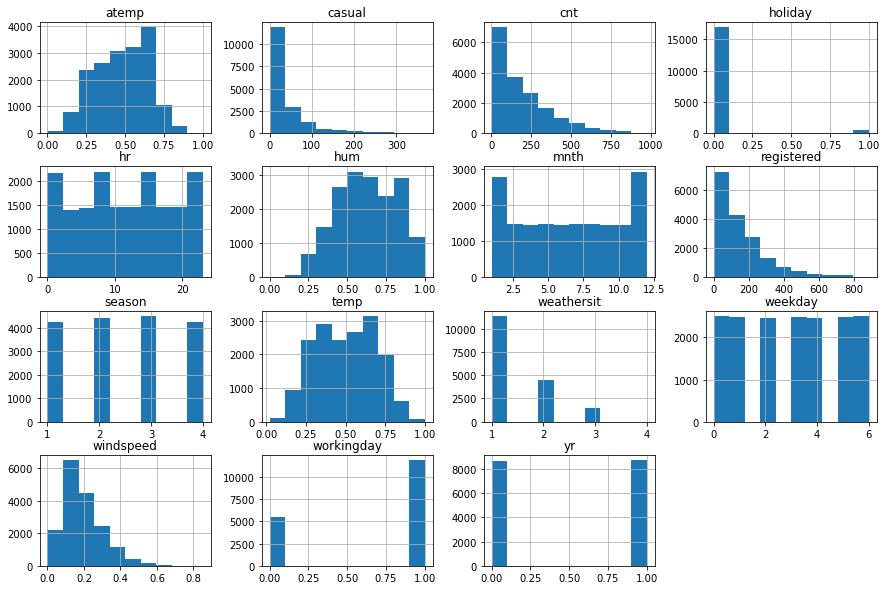

In [17]:
df_hr.hist(figsize=(15,10));

### Inference from Histogram:
* Holiday, Season, weathersit, weekday, workingday, yr  are Discrete Categorical Variables. 
* weathersit has value in range from 1 to 4 and the 1st value has the maximum number of obervation and 4th value has approximately no observation as comapred to others. 
* Holiday attribute is binary categorical, and the 0 value has the maximum number of observations
* atemp, temp, hum seems to be normally distributed
* working day attribute is also binary categorical, and the 1 value has the maximum number of observations
* casual, cnt, registered, windspeed are positively skewed ie, shifted towards left 
* yr attribute is also binary categorical, and both 1 and 0 has same number of observations

### Outlier Detection

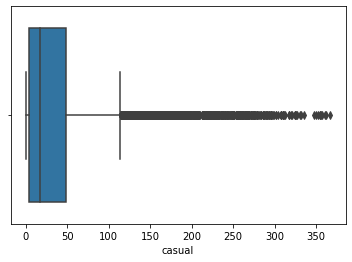

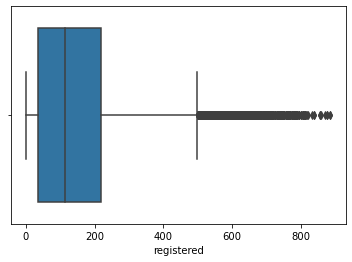

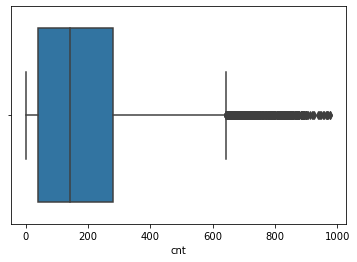

In [23]:
col = ['casual', 'registered', 'cnt']
for i in col:
    sns.boxplot(df_hr[i])
    plt.show()

- This confirms the statistically observation to be true, as these coulmns have many outliers.

### Let's Analyse the relationship of all independent  variables with dependent variables

In [19]:
df_hr.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


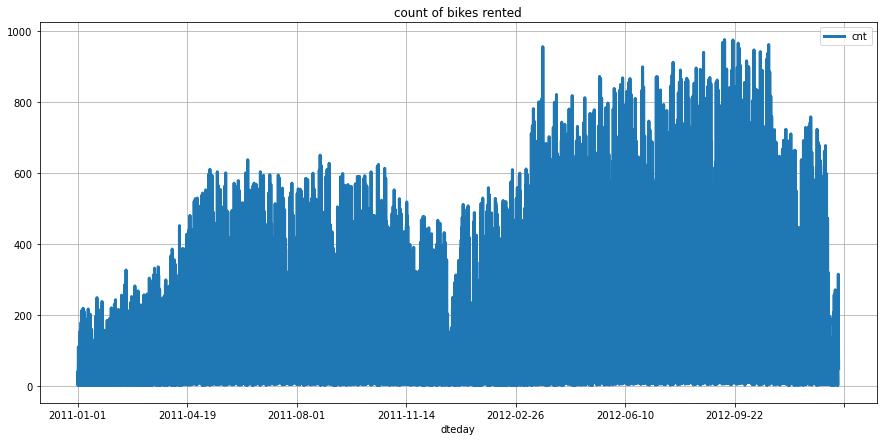

In [20]:
df_hr.plot(x ='dteday', y='cnt', figsize = (15,7), linewidth = 3, title = 'Count of bikes rented Day-wise')
plt.grid()
plt.show()

- This plot gives the inference that in year 2012 we have maximum number of bikes rented. 

<hr>

**Let's Analyse more closely :**

In [25]:
df_hr['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

**season (1: winter, 2: spring, 3: summer, 4: fall)**
- Season 2 and 3 have approximately same number of observations, which indicates in the season 2 and 3 most of bikes were rented. 
- As comparision to season 2 & 3, Season 1 and 4 have less number of bikes rented.

In [39]:
df_season = df_hr.groupby(['season']).sum()
df_season['season'] = df_season.index
df_season

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,season
season,,,,,,,,,,,,,,,
1,2174,13234,49413,164,12763,2794,6194,1268.98,1264.6101,2466.08,912.4850,60622,410726,471348,1
2,2206,20520,50757,96,13190,3066,6365,2401.42,2295.0915,2764.54,896.8359,203522,715067,918589,2
3,2256,34573,51738,96,13637,3141,5981,3176.02,2949.3918,2846.72,771.4810,226091,835038,1061129,3
4,2098,45293,48763,144,12611,2864,6230,1790.72,1759.4021,2823.27,722.9044,129782,711831,841613,4


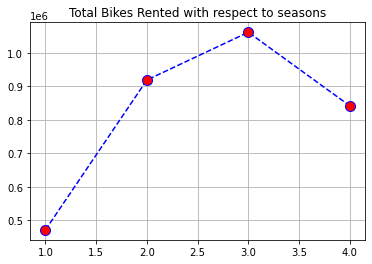

In [37]:
plt.plot(df_season['season'], df_season['cnt'], 
         color='blue', linestyle='dashed', marker='o', 
         markerfacecolor='red', markersize=10)
plt.title('Total Bikes Rented with respect to seasons ')
plt.grid()
plt.show()

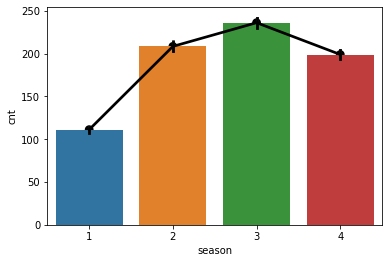

In [69]:
sns.barplot(df['season'], df['cnt'])
sns.pointplot(df['season'], df['cnt'], color='black');

<h4 align='center'> season (1: winter, 2: spring, 3: summer, 4: fall) </h4>

### Inference: 
- Season 3 has maximum count of bikes rented. 
- Season 1 has least count of bike rented.
- Season 2 and 4 have approximately same number of count.

In [26]:
df_hr['yr'].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

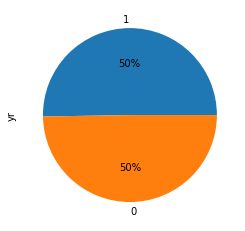

In [27]:
df_hr['yr'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

**year (0: 2011, 1: 2012)**
- Both the years 2011 and 2012 have same number of observations. 

In [55]:
df_yr = df_hr.groupby(['yr']).sum()
df_yr['yr'] = df_yr.index
df_yr

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,yr
yr,,,,,,,,,,,,,,,
0,21730,56832,100054,239,26045,5911,12428,4228.00,4054.5089,5562.45,1652.6842,247252,995851,1243103,0
1,21746,56788,100617,261,26156,5954,12342,4409.14,4213.9866,5338.16,1651.0221,372765,1676811,2049576,1


Text(0.5, 1.0, 'Total count of Bikes yearly')

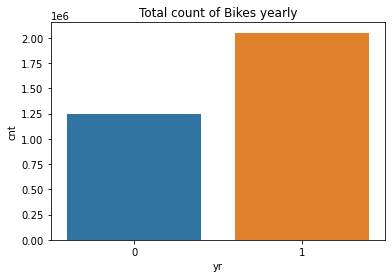

In [34]:
sns.barplot(df_yr['yr'], df_yr['cnt'])
plt.title("Total count of Bikes yearly");

- Year 2012 has maximum number of bikes rented 

In [42]:
df_hr['mnth'].value_counts()

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: mnth, dtype: int64

- Month 5,7,12 seems to have maximum number of observations. 
- Month 2 seems to have minimum number of observations as compared to rest months. 

**Let's analyse Further**

In [41]:
df_month = df_hr.groupby(['mnth']).sum()
df_month['mnth'] = df_month.index
df_month

,season,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnth
mnth,,,,,,,,,,,,,,,
1,1429,741,16715,71,4101,907,2082,339.60,343.9261,830.15,296.5903,12042,122891,134933,1
2,1341,692,15639,47,4038,913,1957,402.58,403.1323,760.63,289.6041,14963,136389,151352,2
3,1997,743,17060,0,4578,1069,2172,575.80,563.1266,867.67,327.7673,44444,184476,228920,3
4,2874,718,16550,48,4315,957,2093,675.42,656.8665,845.12,336.7225,60802,208292,269094,4
5,2976,744,17112,48,4320,1032,2175,885.06,841.7050,1025.17,272.2874,75285,256401,331686,5
6,3360,720,16560,0,4464,1032,1859,985.10,919.0738,829.16,267.0047,73906,272436,346342,6
7,4464,744,17112,48,4368,984,1866,1124.14,1047.6917,889.64,247.0956,78157,266791,344948,7
8,4425,744,16968,0,4428,1104,1951,1045.34,961.0454,939.91,252.9160,72039,279155,351194,8
9,4695,720,16554,48,4385,957,2139,885.92,832.5180,1026.67,238.3354,70323,275668,345991,9


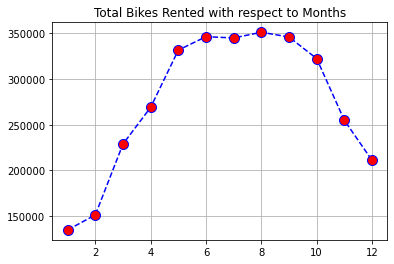

In [43]:
plt.plot(df_month['mnth'], df_month['cnt'], 
         color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Total Bikes Rented with respect to Months')
plt.grid()
plt.show()

- Month 5,6,7,8 Have apprximately same number of bikes rented. 
- Month 1 and 2 have least number of bikes rented. 

In [44]:
df_hr['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

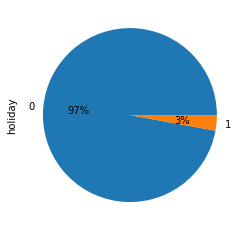

In [45]:
df_hr['holiday'].value_counts().plot(kind='pie', autopct = "%1.0f%%");

- 97% days there is No holiday only 3% data contains holiday 
- Imbalanced observations

In [46]:
df_holiday = df_hr.groupby(['holiday']).sum()
df_holiday['holiday'] = df_holiday.index
df_holiday

,season,yr,mnth,hr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,holiday
holiday,,,,,,,,,,,,,,,
0,42256,8473,110167,194888,51294,11865,24089,8403.94,8046.0703,10592.93,3207.2403,597658,2616586,3214244,0
1,1220,261,3453,5783,907,0,681,233.20,222.4252,307.68,96.4660,22359,56076,78435,1


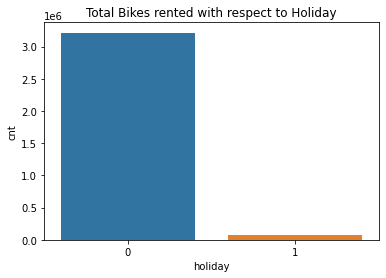

In [75]:
sns.barplot(df_holiday['holiday'], df_holiday['cnt'])
plt.title('Total Bikes rented with respect to Holiday');

- Cleary it suggest when ther is no holiday people used to rent the bike more. 
- On holiday people have very less number of bikes rented.

In [51]:
df_hr['weekday'].value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

- On weekday 0,6 we have more number of observations

In [50]:
df_weekday = df_hr.groupby(['weekday']).sum()
df_weekday['weekday'] = df_weekday.index
df_weekday

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weekday
weekday,,,,,,,,,,,,,,,
0,6231,1271,16231,28911,0,0,3408,1210.52,1164.6976,1571.24,470.6084,140521,303506,444027,0
1,6169,1244,16062,28649,357,2122,3548,1227.22,1179.7755,1575.78,468.1913,70784,384719,455503,1
2,6204,1231,15986,28509,23,2430,3621,1247.52,1195.0513,1569.51,470.7732,57843,411266,469109,2
3,6214,1246,16196,28530,24,2451,3677,1254.02,1196.7316,1595.93,463.2512,57319,415729,473048,3
4,6231,1246,16284,28555,48,2423,3465,1252.84,1198.4877,1506.39,474.4004,61460,423935,485395,4
5,6207,1248,16399,28670,48,2439,3512,1234.62,1173.4364,1526.62,463.6522,78238,409552,487790,5
6,6220,1248,16462,28847,0,0,3539,1210.40,1160.3154,1555.14,492.8296,153852,323955,477807,6


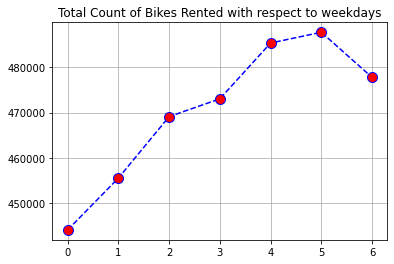

In [53]:
plt.plot(df_weekday['weekday'], df_weekday['cnt'],
         color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Total Count of Bikes Rented with respect to weekdays')
plt.grid()
plt.show()

- On weekday 4 and 5 we have approximately same number of bikes rented. 
- When weekday is 0 ,there is least number of bikes rented. 

In [54]:
df_hr['workingday'].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

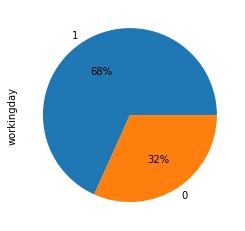

In [73]:
df_hr['workingday'].value_counts().plot(kind='pie', autopct = "%1.0f%%");

In [57]:
df_working = df_hr.groupby(['workingday']).sum()
df_working['workingday'] = df_working.index
df_working

,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,workingday
workingday,,,,,,,,,,,,,,,
0,13671,2780,36146,63541,500,15979,7628,2654.12,2547.4382,3434.06,1059.9040,316732,683537,1000269,0
1,29805,5954,77474,137130,0,36222,17142,5983.02,5721.0573,7466.55,2243.8023,303285,1989125,2292410,1


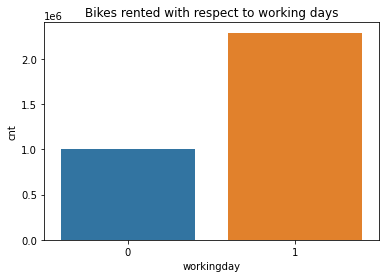

In [72]:
sns.barplot(df_working['workingday'], df_working['cnt'])
plt.title("Bikes rented with respect to working days");

**when there is neither holiday nor weekend, workingday =1, else 0**
- When there is working day, The count of bikes rented are more compared to not a working day

In [59]:
df_hr['weathersit'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

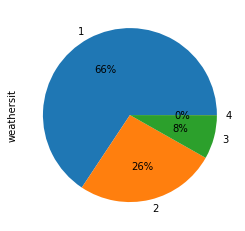

In [60]:
df_hr['weathersit'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

**1: Clear, Few clouds, Partly cloudy, Partly cloudy**

**2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist**

**3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds**

**4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog**

<hr>

- Majority of times ie, 66% the weather is clear.
- 26% of times, there is some mist 
- aproximately 0% of times in the dataset, there is heavy rain + thunderstorm etc 

In [61]:
df_weather = df_hr.groupby(['weathersit']).sum()
df_weather['weathersit'] = df_weather.index
df_weather.head()

,season,yr,mnth,hr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit
weathersit,,,,,,,,,,,,,,,
1,28659,5768,74320,133894,341,34229,7632,5832.66,5573.9554,6548.17,2174.7828,462745,1875428,2338173,1
2,11326,2326,30076,49799,137,13680,3191,2155.88,2074.7476,3175.38,817.7993,134481,661471,795952,2
3,3488,638,9221,16943,22,4282,1040,648.04,619.2318,1174.41,310.5122,22783,135548,158331,3
4,3,2,3,35,0,10,2,0.56,0.5607,2.65,0.6120,8,215,223,4


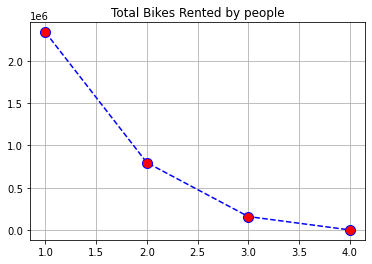

In [68]:
plt.plot(df_weather['weathersit'], df_weather['cnt'], 
         color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Total Bikes Rented by people')
plt.grid()
plt.show()

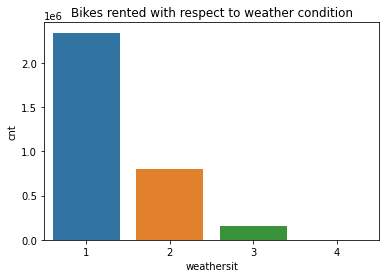

In [71]:
sns.barplot(df_weather['weathersit'], df_weather['cnt'])
plt.title('Bikes rented with respect to weather condition');

- When the weather is clear, The count of bikes rented are more 
- Aproximately 0% from whole dataset, the bikes were rented when weather has high rain + thunderstorm. 

### Analysis with Numerical variables

In [79]:
df_hr.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


By previous obseravtions: 
- atemp, temp, hum seems to have normal distribution 
- cnt, count, registered have many outliers. 

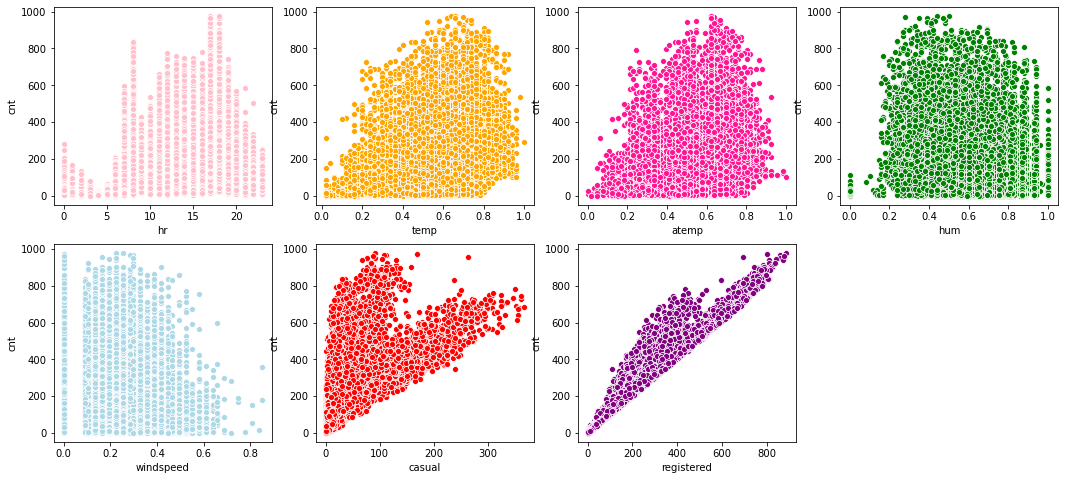

In [117]:
plt.figure(figsize=(18,8))

plt.subplot(2,4,1)
sns.scatterplot(df_hr['hr'], df_hr['cnt'], color='pink')

plt.subplot(2,4,2)
sns.scatterplot(df_hr['temp'], df_hr['cnt'], color='orange')

plt.subplot(2,4,3)
sns.scatterplot(df_hr['atemp'], df_hr['cnt'], color='deeppink')

plt.subplot(2,4,4)
sns.scatterplot(df_hr['hum'], df_hr['cnt'], color='green')

plt.subplot(2,4,5)
sns.scatterplot(df_hr['windspeed'], df_hr['cnt'], color='lightblue')

plt.subplot(2,4,6)
sns.scatterplot(df_hr['casual'], df_hr['cnt'], color='red')

plt.subplot(2,4,7)
sns.scatterplot(df_hr['registered'], df_hr['cnt'], color='purple');

- With respect to hours, during time interval 8-9 and 18-19 ie at evening 6-7 Most of the people rent the bike.
- Registered attribute has vey strong linear relationship with cnt(target) variable.
- Casual is also having some sort of linear relation with cnt. 

### Correlation Matrix

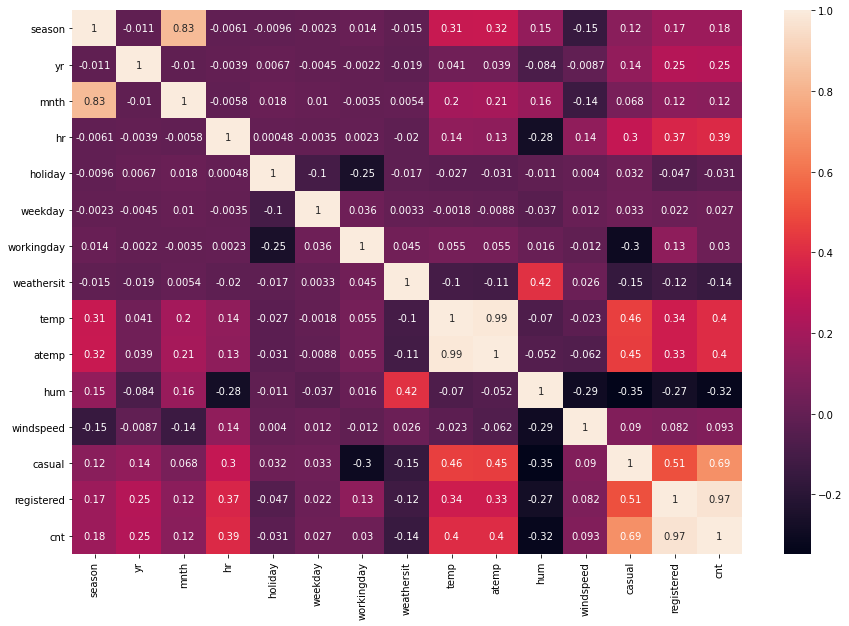

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(df_hr.corr(), annot = True)

### Inference: 
- There is high positive correlation between month and season.
- Target variable has moderate positve correlation with temp, atemp, hr.
- Target variable has High positve correlation with registered, and casual.
- There is moderate positve correlation between weather condition and humidity
- Attribute Humidity has moderate negative correlation with registered, casual, windspeed, and with cnt(target variable)
- There is moderate positve correlation between casual and temperature, casual and atemp.

In [78]:
data = df_hr.copy()
data = data.drop(['dteday'], axis=1)
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- There is No Object variable so, no need for label encoding/one hot encoding

### Spliting Data into x(independent variables) and y(target variable)

In [121]:
x = data.drop('cnt', axis=1)
x.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [122]:
y = data.cnt
y.head()

0    16
1    40
2    32
3    13
4     1
Name: cnt, dtype: int64

### Spliting data into test and training set

In [123]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [133]:
print("Dataset shape:", data.shape)
print("Input Features shape: ", x_train.shape, y_train.shape)
print("Output Features shape: ", x_test.shape, y_test.shape)

Dataset shape: (17379, 15)
Input Features shape:  (12165, 14) (12165,)
Output Features shape:  (5214, 14) (5214,)


<h2 align='center'> Linear Regression </h2>

In [295]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training model:
lr = lr.fit(x_train, y_train)
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

#### Prediction on Train and Test set

In [296]:
lr_pred_train = lr.predict(x_train)
lr_pred_test = lr.predict(x_test)

#### Accuracy on Training and Test Set

In [297]:
print("Training Accuracy: ", r2_score(y_train, lr_pred_train ))
print("Test Accuracy: ", r2_score(y_test, lr_pred_test))

Training Accuracy:  1.0
Test Accuracy:  1.0


- Both Train and test accuracy is 100% 

**RMSE value on Training and Test Set**

In [301]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, lr_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, lr_pred_test)))

RMSE On Trainng Data:  2.323882708841133e-13
RMSE On Test Data:  2.343207557511179e-13


- RMSE On both Training and Test Set is approximately zero. 

**Visuall Representation of predictions**

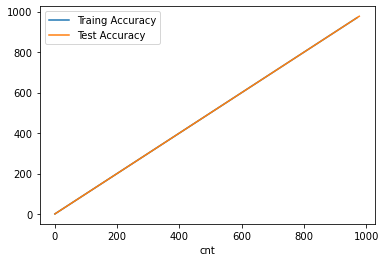

In [303]:
sns.lineplot(y_train, lr_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, lr_pred_test, label = 'Test Accuracy');

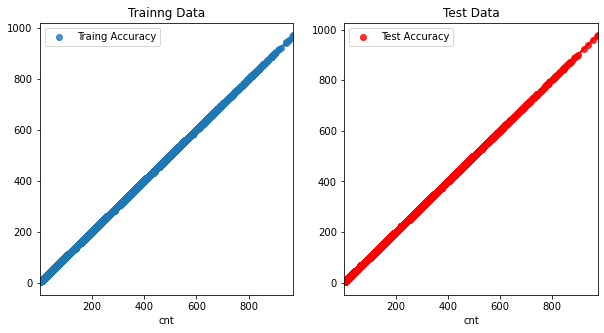

In [304]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.regplot(y_train, lr_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, lr_pred_test, label='Test Accuracy', color='r')
plt.title("Test Data")
plt.legend()

plt.show()

<h2 align='center'> Decision Tree </h2>

In [305]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)

# Training Model
dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

#### Prediction on Training and Test Set

In [306]:
dt_pred_train = dt.predict(x_train)
dt_pred_test = dt.predict(x_test)

#### Accuracy on Training and Test Set

In [307]:
print("Training Accuracy: ", r2_score(y_train, dt_pred_train ))
print("Test Accuracy: ", r2_score(y_test, dt_pred_test))

Training Accuracy:  1.0
Test Accuracy:  0.9990328310020978


- Both Training and Test Set accuracy are 100% 

**RMSE On Training and Test Set**

In [308]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, dt_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, dt_pred_test)))

RMSE On Trainng Data:  0.0
RMSE On Test Data:  5.6528690978305445


- RMSE on training is zero whereas RMSE on test set is aslo acceptable as it ia also small value.

**Visualising Results**

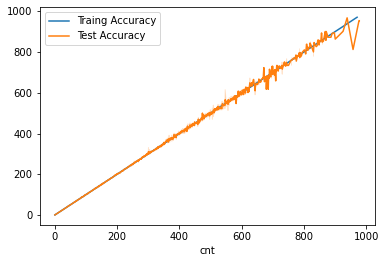

In [309]:
sns.lineplot(y_train, dt_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, dt_pred_test, label = 'Test Accuracy');

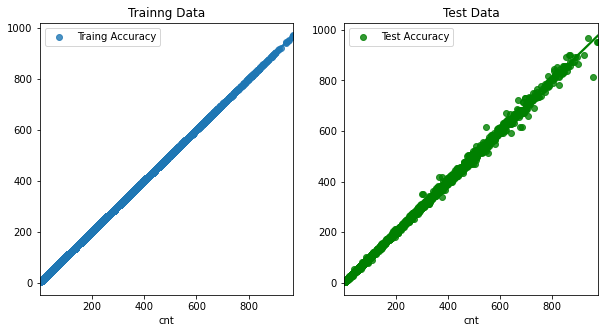

In [310]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.regplot(y_train, dt_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, dt_pred_test, label='Test Accuracy', color='g')
plt.title("Test Data")
plt.legend()

plt.show()

### Hyper-parameter tunning 
- To reduce the dimensionality 
- Reducing max_depth so as the model doesn't overfit

In [311]:
dt1 = DecisionTreeRegressor(max_depth=10, max_features=4, min_samples_split=3, random_state=0)
dt1.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features=4, min_samples_split=3,
                      random_state=0)

#### Prediction on Training and Test Set

In [312]:
dt1_pred_train = dt1.predict(x_train)
dt1_pred_test = dt1.predict(x_test)

#### Accuracy on Training and Test Set

In [314]:
print("Training Accuracy: ", r2_score(y_train, dt1_pred_train ))
print("Test Accuracy: ", r2_score(y_test, dt1_pred_test))

Training Accuracy:  0.989881184463726
Test Accuracy:  0.9824476811606382


- Both Training and Test Set accuracy reduced to 98% seems that model is not overfitted now.
- We have reduced 14 features to 4 features, ie dimensionality is reduced.

**RMSE On Training and Test Set**

In [315]:
print("RMSE On Trainng Data: ",np.sqrt(mean_squared_error(y_train, dt1_pred_train)))
print("RMSE On Test Data: ", np.sqrt(mean_squared_error(y_test, dt1_pred_test)))

RMSE On Trainng Data:  18.228984143190235
RMSE On Test Data:  24.081580951302975


- RMSE on training is 18.22 which is less than 10% of the mean of target columns whereas RMSE on test set is more than 10% of the mean of target variable, still we can accept this RMSE as we have overcome the dimensionality problem.

**Visualising Results**

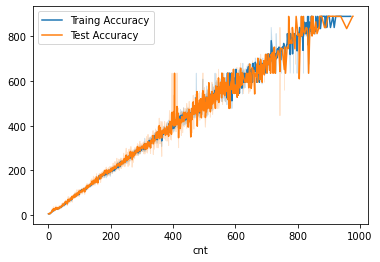

In [317]:
sns.lineplot(y_train, dt1_pred_train, label='Traing Accuracy')
sns.lineplot(y_test, dt1_pred_test, label = 'Test Accuracy');

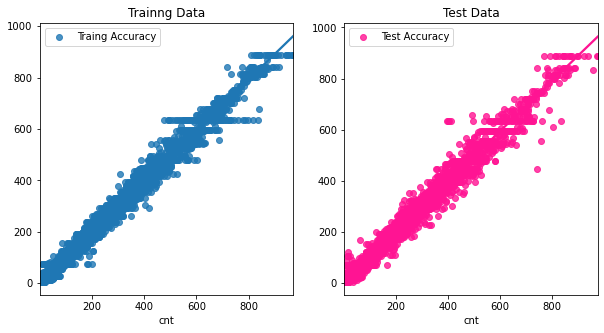

In [318]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.regplot(y_train, dt1_pred_train, label='Traing Accuracy')
plt.title("Trainng Data")
plt.legend()

plt.subplot(1,2,2)
sns.regplot(y_test, dt1_pred_test, label='Test Accuracy', color='deeppink')
plt.title("Test Data")
plt.legend()

plt.show()

<h2 align='center'> Conclusion </h2>

<hr> 

### Result :
- Linear Regression : 100% accurate on test data
- Decision Tree: 98% accurate on test data

By Linear Regression we had acheieved 100% accuracy in predicting count of rental bikes, But we have taken all 14 columns for predicting in Linear Regression,  whereas In Decision Tree we had reduced 14 features to 4, due to which our model is simple and efficient and 98% accurate. 

Therefore, by applying hyper-parameter tunning in Decision Tree we achieved 98% accurate result in predicting count of rental bikes.  